<a href="https://colab.research.google.com/github/behinoo/Stock-Movement-Prediction-CNN/blob/master/Stock_Prediction_Image_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
! pip install quandl 
!pip install yfinance
 
# Import yfinance
import yfinance as yf  



import time
import datetime
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
  
import matplotlib.pyplot as plt
import quandl 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.spatial.distance import pdist, squareform #scipy spatial distance
import sklearn as sk
import sklearn.metrics.pairwise
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU
from keras import metrics
from keras import backend as K
import time
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils import np_utils

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

     |████████████████████████████████| 61kB 17.7MB/s 
     |████████████████████████████████| 61kB 22.9MB/s 
     |████████████████████████████████| 2.3MB 41.6MB/s 
     |████████████████████████████████| 102kB 28.0MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=bceeae138fa7470018d8d1865337fcd8c5e90157cd5713839261982c8633c53e
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0
  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=f45d92bd67690bded985f9f6bdf68965254aed0f897d6d666364fbb5c4047cdf
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a

Using TensorFlow backend.


## Functions

In [0]:
"""This cell defines the plot_candles function, the orginal code was obtained from
https://www.quantopian.com/posts/plot-candlestick-charts-in-research and was 
modified"""

def plot_candles(pricing = None, title=None,
                 volume_bars=False,
                 color_function=None,
                 overlays=None,
                 technicals=None,
                 technicals_titles=None,
                 save =False,
                 name = None,
                 multi_stocks = None,
                 start="2016-01-01",
                 end=dt.datetime.now()):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      overlays: A list of additional data series to overlay on top of pricing.  Must be the same length as pricing.
      technicals: A list of additional data series to display as subplots.
      technicals_titles: A list of titles to display for each technical indicator.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    overlays = overlays or []
    technicals = technicals or []
    technicals_titles = technicals_titles or []

    
    subplot_count = 1
    if volume_bars:
        subplot_count = 2
    if technicals:
        subplot_count += len(technicals)
    
    if multi_stocks: 
        subplot_count = len(multi_stocks)*2
        
    if subplot_count == 1:
        fig, ax1 = plt.subplots(1, 1)
    

    else:
        ratios = np.insert(np.full(subplot_count - 1, 1), 0, 3)
        fig, subplots = plt.subplots(subplot_count, 1, sharex=True, gridspec_kw={'height_ratios': ratios})
        
        
    
    
    for i, ticker in enumerate(multi_stocks):
        pricing = yf.download(ticker,start,end)
  
        #pricing = quandl.get('WIKI/'+ticker, start_date=start, end_date=end, api_key='ay8CQ4aziAGd-vb8stz6')
        
        ax1 = subplots[i*2]
        #ax1.set_title(ticker)
        open_price = pricing['Open']
        close_price = pricing['Close']
        low = pricing['Low']
        high = pricing['High']
        oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
        oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
        x = np.arange(len(pricing))
        candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
        candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
        lines = ax1.vlines(x + 0.4, low, high, color=candle_colors, linewidth=1)
        ax1.xaxis.grid(False)
        ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
        ax1.plot(pricing['Close'].values,color = 'b')
        # Assume minute frequency if first two bars are in the same day.
        frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
        time_format = '%d-%m-%Y'
        if frequency == 'minute':
            time_format = '%H:%M'
        # Set X axis tick labels.
        #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
        for overlay in overlays:
            ax1.plot(x, overlay)
        # Plot volume bars if needed
        if volume_bars:
            ax2 = subplots[i*2+1]
            volume = pricing['Volume']
            volume_scale = None
            scaled_volume = volume
            if volume.max() > 1000000:
                volume_scale = 'M'
                scaled_volume = volume / 1000000
            elif volume.max() > 1000:
                volume_scale = 'K'
                scaled_volume = volume / 1000
            ax2.bar(x, scaled_volume, color=candle_colors)
    #         volume_title = 'Volume'
    #         if volume_scale:
    #             volume_title = 'Volume (%s)' % volume_scale
    #         ax2.set_title(volume_title)
            ax2.xaxis.grid(False)
        # Plot additional technical indicators
        for (i, technical) in enumerate(technicals):
            ax = subplots[i - len(technicals)] # Technical indicator plots are shown last
            ax.plot(x, technical)
            if i < len(technicals_titles):
                ax.set_title(technicals_titles[i])
                
                
    if save: plt.savefig('/content/drive/My Drive/Stocks/'+name) 
    
    

## Plot Single Stock

In [3]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


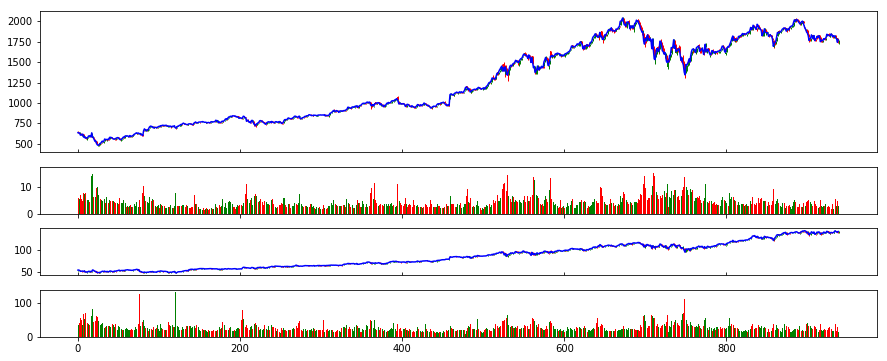

In [4]:
import datetime
windows = 20 
start_date = "2016-01-01"
start_date = pd.to_datetime(start_date)
end_date = dt.datetime.now()
plot_candles(  volume_bars=True, save = True,name = 'amazon.png', multi_stocks=['AMZN','MSFT'],start = start_date, end = end_date )


In [0]:
! rm -r "/content/drive/My Drive/Stocks/"
! /bin/mkdir -p "/content/drive/My Drive/Stocks"

In [0]:
from tqdm import tqdm

start_date = "2016-01-01"
start_date = pd.to_datetime(start_date)
Final_date = dt.datetime.now() # pd.to_datetime("2016-02-01")#
Interval = 5#((end_date-start_date)/windows).days


#  some days stock market is closed so in I am getting the dates from this so I only get data for the day that 
#  we have data for
data = yf.download('AMZN',start_date,Final_date)
# data = quandl.get("WIKI/AMZN", start_date= start_date, end_date=Final_date, api_key='ay8CQ4aziAGd-vb8stz6')
#### Label 
data['profit']= (data.Close.shift(-1) - data.Close)/data.Close.shift(-1)
data.dropna(how = 'any',inplace= True)
data['profit']= data['profit'] >= 0.02
data['profit']= data['profit'].astype('int32')



label= data.reset_index ()
label= label[['profit','Date']]

# label['Date'] = label['Date'].astype('str')
# Clean the data

train_dir = 'content/drive/My Drive/Stocks/'

label = label.shift(-19)
label.dropna(how = 'any',inplace= True)
label['profit']= label['profit'].astype('int32')
label.drop(label.index[-1], inplace = True)
label['path'] = label['Date'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
label['Date_str']=label['Date'].astype('str')
#label.drop('Date',axis = 1, inplace= True)



#########


data1 = data.reset_index()
windows = 20 
start_date = label.iloc[0].Date
# data1['Date_str']= data1['Date'].astype('str')


 
#while (Final_date-start_date).days> 20:
for ii in tqdm(range(label.shape[0])):
    
    
    plt.clf()
    end_date   = label.iloc[ii].Date 
    start_date = label.iloc[ii].Date - datetime.timedelta(days=windows)
    
    print("file name:   " ,label.iloc[ii].Date_str)
    plot_candles(  volume_bars=True, save = True,name =label.iloc[ii].Date_str, multi_stocks=['AMZN','MSFT','WMT','NFLX'] , start = start_date, end = end_date )
    ii += 1


label['Date'] = label['Date'].astype('str')
label['path'] = label['Date'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))


[*********************100%***********************]  1 of 1 downloaded

  0%|          | 0/918 [00:00<?, ?it/s]


file name:    2016-02-01
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  0%|          | 1/918 [00:01<21:59,  1.44s/it]

file name:    2016-02-02
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  0%|          | 2/918 [00:03<24:34,  1.61s/it]

file name:    2016-02-03
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  0%|          | 3/918 [00:05<24:24,  1.60s/it]

file name:    2016-02-04
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  0%|          | 4/918 [00:06<24:15,  1.59s/it]

file name:    2016-02-05
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  1%|          | 5/918 [00:08<24:12,  1.59s/it]

file name:    2016-02-08
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  1%|          | 6/918 [00:09<25:01,  1.65s/it]

file name:    2016-02-09
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  1%|          | 7/918 [00:11<24:55,  1.64s/it]

file name:    2016-02-10
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  1%|          | 8/918 [00:13<24:50,  1.64s/it]

file name:    2016-02-11
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


  1%|          | 9/918 [00:14<25:20,  1.67s/it]

file name:    2016-02-12


In [11]:
from fastai.vision import *
from fastai.metrics import accuracy
start_date = "2016-01-01"
start_date = pd.to_datetime(start_date)
Final_date = dt.datetime.now() # pd.to_datetime("2016-02-01")#
Interval = 5#((end_date-start_date)/windows).days


#  some days stock market is closed so in I am getting the dates from this so I only get data for the day that 
#  we have data for
data = yf.download('AMZN',start_date,Final_date)
# data = quandl.get("WIKI/AMZN", start_date= start_date, end_date=Final_date, api_key='ay8CQ4aziAGd-vb8stz6')
#### Label 
data['profit']= (data.Close.shift(-1) - data.Close)/data.Close.shift(-1)
data.dropna(how = 'any',inplace= True)
data['profit']= data['profit'] >= 0.02
data['profit']= data['profit'].astype('int32')



label= data.reset_index ()
label= label[['profit','Date']]

# label['Date'] = label['Date'].astype('str')
# Clean the data

train_dir = 'content/drive/My Drive/Stocks/'

label = label.shift(-19)
label.dropna(how = 'any',inplace= True)
label['profit']= label['profit'].astype('int32')
label.drop(label.index[-1], inplace = True)
label['path'] = label['Date'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
label['Date_str']=label['Date'].astype('str')
#label.drop('Date',axis = 1, inplace= True)



#########


data1 = data.reset_index()
windows = 20 
start_date = label.iloc[0].Date

label['Date'] = label['Date'].astype('str')
label['path'] = label['Date'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))


[*********************100%***********************]  1 of 1 downloaded


In [0]:
# Data Augmentation and Transformation up to Data Bunch
tfms = get_transforms()
sz= 100
bs =10
src = (ImageList.from_df(df=label,path =".."
                         
                         ,cols='path'
                         
                        ) 
        .split_by_rand_pct(0.3) 
        .label_from_df(cols='profit') 
      )
data= (src.databunch(bs=bs,num_workers=4) 
        .normalize(imagenet_stats)      
       )

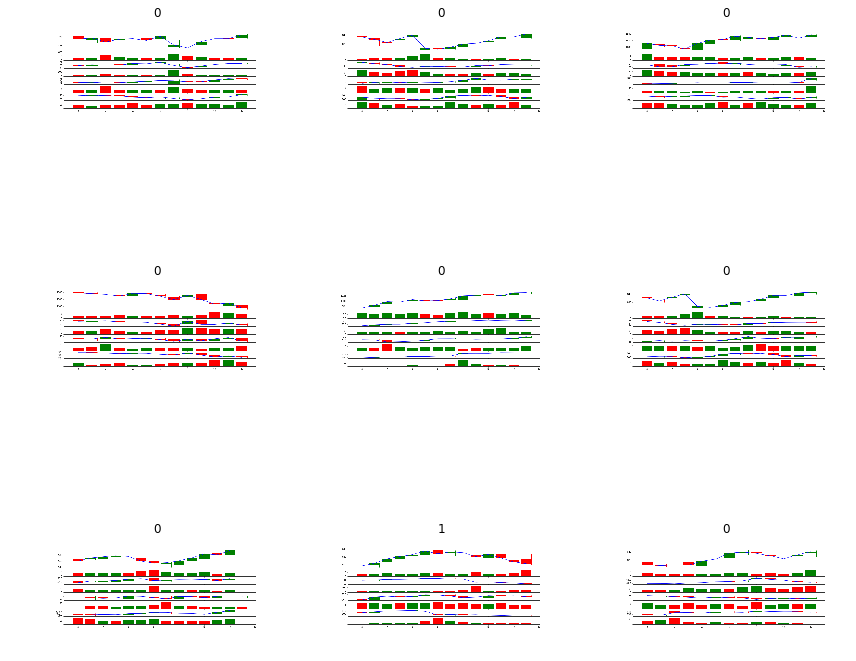

In [13]:
data.show_batch(rows=3)

In [0]:
# !kill -9 -1

In [14]:
learn = cnn_learner(data, models.resnet34)
# Let's fit a couple of cycles
learn.fit_one_cycle(2)





epoch,train_loss,valid_loss,time


FileNotFoundError: ignored

In [0]:
# Now let's find a more accurate learning rate
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
import torch
torch.cuda.get_device_name(0)

In [0]:
# Let's fit some more with a more accurate learning rate
learn.fit_one_cycle(8, max_lr=slice(1e-04))

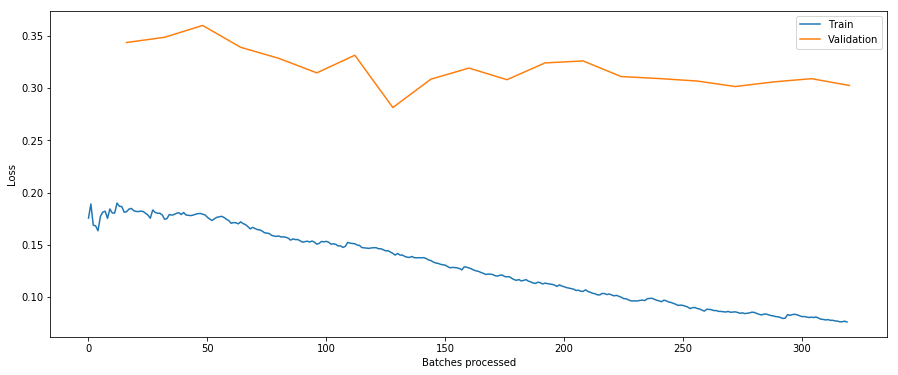

In [15]:
learn.recorder.plot_losses()

The accuracy is 0.8795620203018188 %.
ROC area is 0.6634114583333334


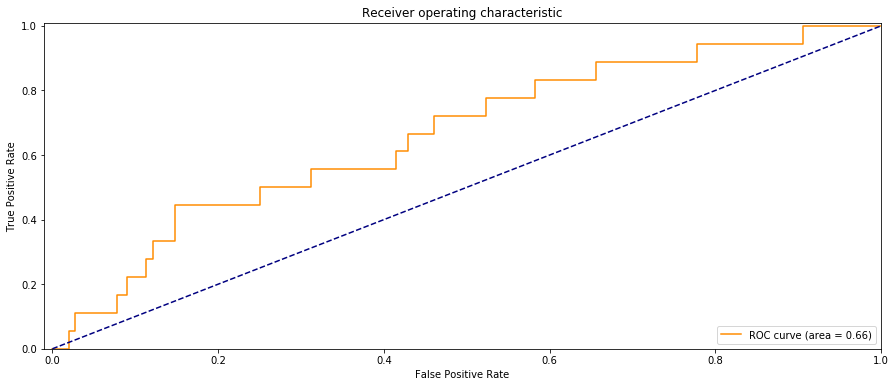

In [16]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))


from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [0]:
Criteria= pd.DataFrame()
Criteria['fpr']= fpr
Criteria['tpr']= tpr
Criteria['thresholds']= thresholds
Criteria

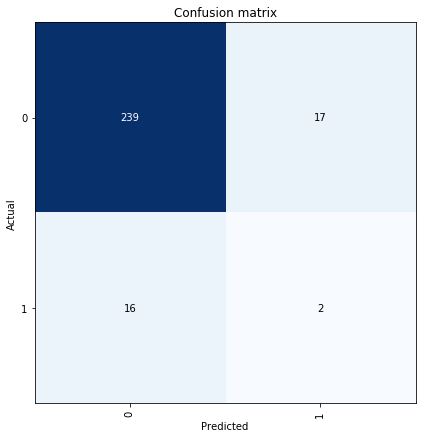

In [17]:
# predict the validation set with our model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')


In [68]:
data1.shape

(936, 9)

In [69]:
label.shape

(916, 2)

# Use Pure Pytorch

